In [ ]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# ***Data Pre-processing***

In [ ]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# ***Dropping 'id' column***

In [ ]:
list_of_columns_to_drop=['id']
dataset = dataset.drop(list_of_columns_to_drop, axis = 1)

For 'gender' type

In [ ]:
pd.crosstab(dataset.stroke, dataset.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


Droping 'other' type because only one entry exist.

In [ ]:
dataset=dataset[dataset['gender']!='Other']
dataset.shape

(5109, 11)

For 'hypertension' type

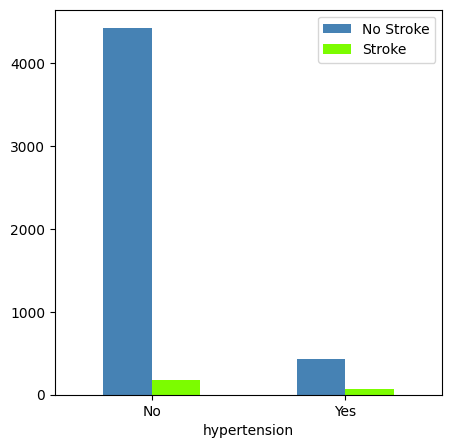

In [ ]:
ct1 = pd.crosstab(dataset.hypertension,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(["No","Yes"])
ax1.legend(labels=['No Stroke', 'Stroke'])

For 'heart-disease' type

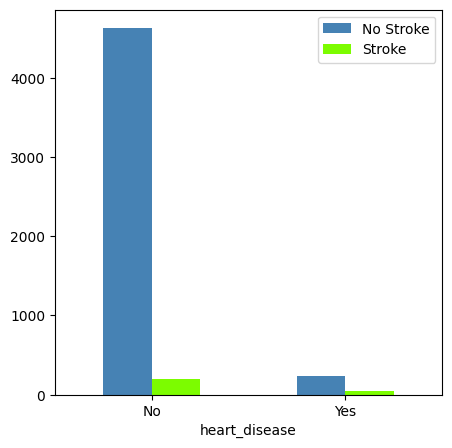

In [ ]:
ct1 = pd.crosstab(dataset.heart_disease,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(["No","Yes"])
ax1.legend(labels=['No Stroke', 'Stroke'])

for 'ever_married'

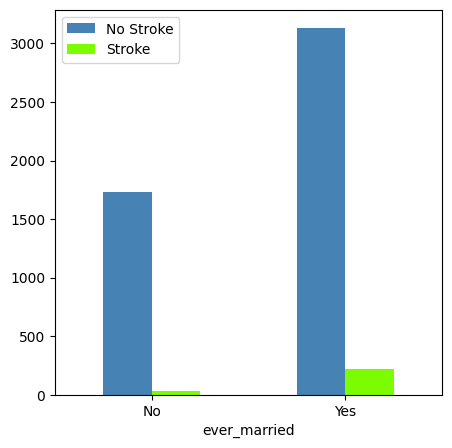

In [ ]:
ct1 = pd.crosstab(dataset.ever_married,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.set_xticklabels(["No","Yes"])
ax1.legend(labels=['No Stroke', 'Stroke'])

for 'work_type'

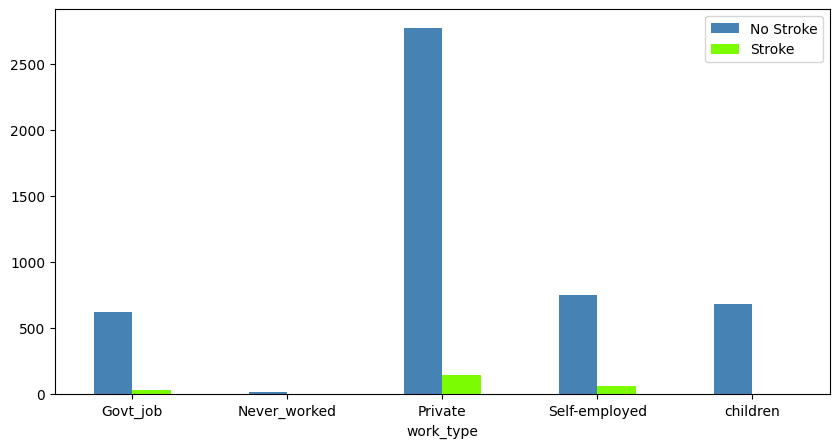

In [ ]:
ct1 = pd.crosstab(dataset.work_type,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.legend(labels=['No Stroke', 'Stroke'])

for 'Residence_type'

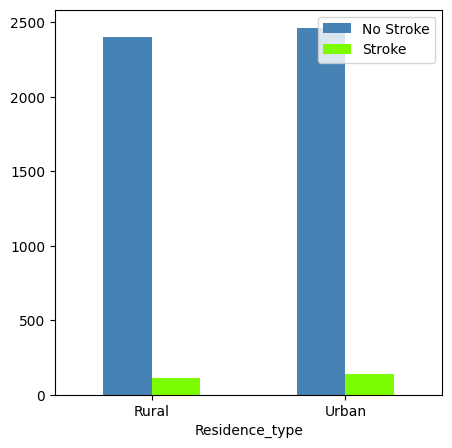

In [ ]:
ct1 = pd.crosstab(dataset.Residence_type,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.legend(labels=['No Stroke', 'Stroke'])

for 'smoking_status'

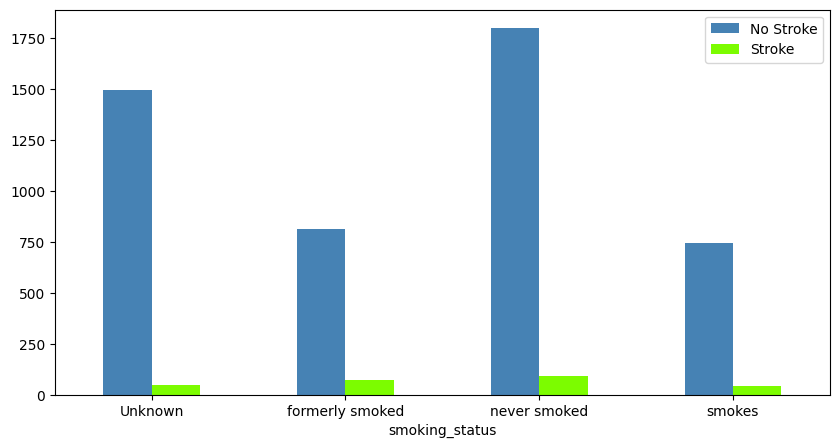

In [ ]:
ct1 = pd.crosstab(dataset.smoking_status,dataset.stroke)
colors = ["steelblue","lawngreen"]
fig,(ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ax1.legend(labels=['No Stroke', 'Stroke'])

no. of people of  various age, bmi, glucose level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

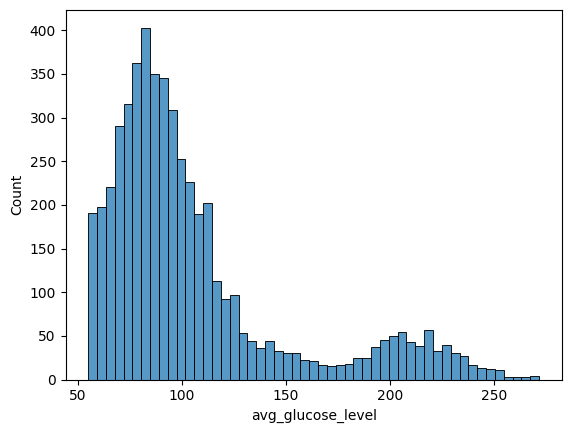

In [ ]:
sns.histplot(dataset['avg_glucose_level'])

<Axes: xlabel='bmi', ylabel='Count'>

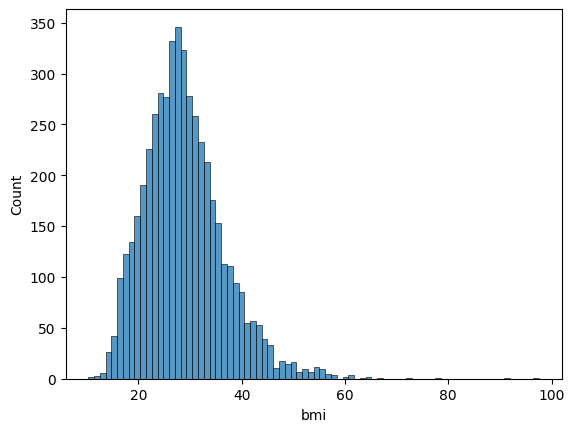

In [ ]:
sns.histplot(dataset['bmi'])

<Axes: xlabel='age', ylabel='Count'>

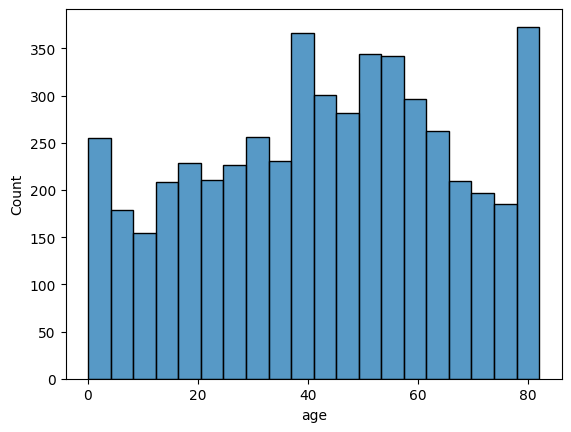

In [ ]:
sns.histplot(dataset['age'])

# ***Finding Null Values***

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
feature='bmi'
print("Number of rows with null values in category_desc column: ", dataset[feature].isnull().sum())

Number of rows with null values in category_desc column:  201


# ***Deleting Null values***

In [ ]:
dataset = dataset[dataset['bmi'].notna()]

In [ ]:
dataset.shape

(4908, 11)

In [ ]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
print("After Update number of rows with null values in category_desc column: ", dataset[feature].isnull().sum())

After Update number of rows with null values in category_desc column:  0


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
dataset['stroke'].value_counts()
negative = len(dataset[dataset['stroke'] == 0])
positive = len(dataset[dataset['stroke'] == 1])
print ("Stroke data ratio (Negative/Positive) : " + str(negative) +' / '+ str(positive))


Stroke data ratio (Negative/Positive) : 4699 / 209


One-hot encoding

In [ ]:
enc = LabelEncoder()

In [ ]:
dataset['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dataset['gender'] = enc.fit_transform(dataset['gender'])
print(dataset['gender'])

0       1
2       1
3       0
4       0
5       1
       ..
5104    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 4908, dtype: int64


In [ ]:
dataset['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset['ever_married'] = enc.fit_transform(dataset['ever_married'])
print(dataset['ever_married'])

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 4908, dtype: int64


In [ ]:
dataset['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
dataset['work_type'] = enc.fit_transform(dataset['work_type'])
print(dataset['work_type'])

0       2
2       2
3       2
4       3
5       2
       ..
5104    4
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 4908, dtype: int64


In [ ]:
dataset['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
dataset['Residence_type'] = enc.fit_transform(dataset['Residence_type'])
print(dataset['Residence_type'])

0       1
2       0
3       1
4       0
5       1
       ..
5104    0
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 4908, dtype: int64


In [ ]:
dataset['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
dataset['smoking_status'] = enc.fit_transform(dataset['smoking_status'])
print(dataset['smoking_status'])

0       1
2       2
3       3
4       2
5       1
       ..
5104    0
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 4908, dtype: int64


In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


# ***Correlation Matrix***

In [ ]:
corr=dataset.corr()
corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030280,0.021811,0.082950,-0.036380,0.058725,-0.004351,0.053161,-0.026164,-0.059837,0.006904
age,-0.030280,1.000000,0.274395,0.257104,0.680742,-0.367033,0.010795,0.236000,0.333314,0.275481,0.232313
hypertension,0.021811,0.274395,1.000000,0.115978,0.162350,-0.052760,-0.001140,0.180614,0.167770,0.110788,0.142503
heart_disease,0.082950,0.257104,0.115978,1.000000,0.111203,-0.030381,-0.002409,0.154577,0.041322,0.055221,0.137929
ever_married,-0.036380,0.680742,0.162350,0.111203,1.000000,-0.358059,0.004707,0.151657,0.341553,0.264598,0.105051
work_type,0.058725,-0.367033,-0.052760,-0.030381,-0.358059,1.000000,-0.005455,-0.050558,-0.304924,-0.310927,-0.033763
Residence_type,-0.004351,0.010795,-0.001140,-0.002409,0.004707,-0.005455,1.000000,-0.007441,-0.000293,0.013739,0.005988
avg_glucose_level,0.053161,0.236000,0.180614,0.154577,0.151657,-0.050558,-0.007441,1.000000,0.175672,0.066403,0.138984
bmi,-0.026164,0.333314,0.167770,0.041322,0.341553,-0.304924,-0.000293,0.175672,1.000000,0.224432,0.042341
smoking_status,-0.059837,0.275481,0.110788,0.055221,0.264598,-0.310927,0.013739,0.066403,0.224432,1.000000,0.051544


<Axes: >

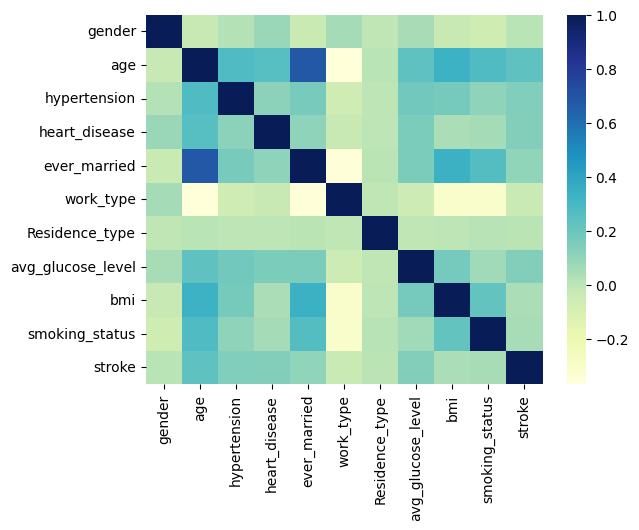

In [ ]:
sns.heatmap(corr,cmap='YlGnBu')

# ***Spliting Dataset***

In [ ]:
X = dataset.drop("stroke", axis=1)
Y = dataset["stroke"]

X.shape, Y.shape

((4908, 10), (4908,))

In [ ]:
# Creating a random seed to mix the data
np.random.seed(88)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)


In [ ]:
stroke=len(Y_train==1)
no_stroke=len(Y_train==0)
stroke,no_stroke

(3435, 3435)

In [ ]:
stroke=len(Y_test==1)
no_stroke=len(Y_test==0)
stroke,no_stroke

(1473, 1473)

In [ ]:
model_names = []
model_scores = []

In [ ]:
def confusion_matrix_plot(matrix, model_name):
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

# ***Decision Tree***

In [ ]:
#train
m1 = DecisionTreeClassifier(random_state=10)
m1.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#test
print(classification_report(Y_test, m1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1410
           1       0.15      0.17      0.16        63

    accuracy                           0.92      1473
   macro avg       0.55      0.56      0.56      1473
weighted avg       0.93      0.92      0.92      1473



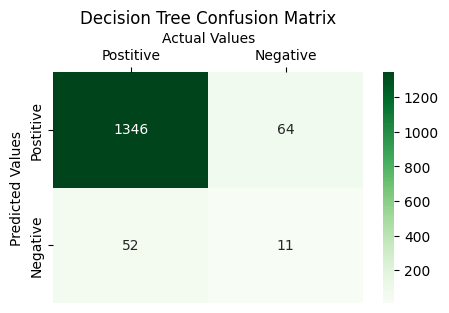

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m1.predict(X_test)), 'Decision Tree')

In [ ]:
model_names.append('Decision Tree')
model_scores.append(roc_auc_score(Y_test, m1.predict(X_test)))

# ***Random Forest***

In [ ]:
#train
m2 = RandomForestClassifier(random_state=10)
m2.fit(X_train, Y_train)

RandomForestClassifier(random_state=10)

In [ ]:
#test
print(classification_report(Y_test, m2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.25      0.02      0.03        63

    accuracy                           0.96      1473
   macro avg       0.60      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473



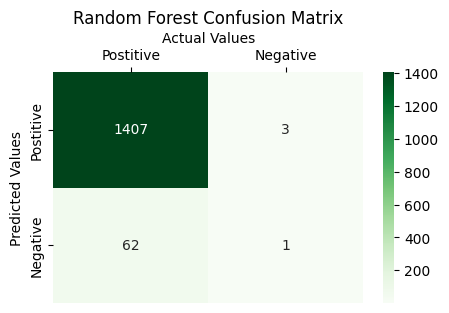

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m2.predict(X_test)), 'Random Forest')

In [ ]:
model_names.append('Random Forest')
model_scores.append(roc_auc_score(Y_test, m2.predict(X_test)))

# ***Xgboost***

In [ ]:
#train
m3 = XGBClassifier(random_state=10)
m3.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
#test
print(classification_report(Y_test, m3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1410
           1       0.19      0.05      0.08        63

    accuracy                           0.95      1473
   macro avg       0.57      0.52      0.53      1473
weighted avg       0.93      0.95      0.94      1473



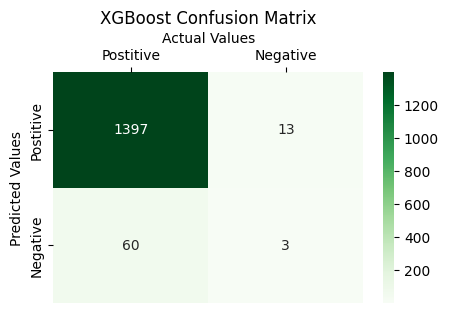

In [ ]:
confusion_matrix_plot(confusion_matrix(Y_test, m3.predict(X_test)), 'XGBoost')

In [ ]:
model_names.append('XGBoost')
model_scores.append(roc_auc_score(Y_test, m3.predict(X_test)))

<BarContainer object of 3 artists>

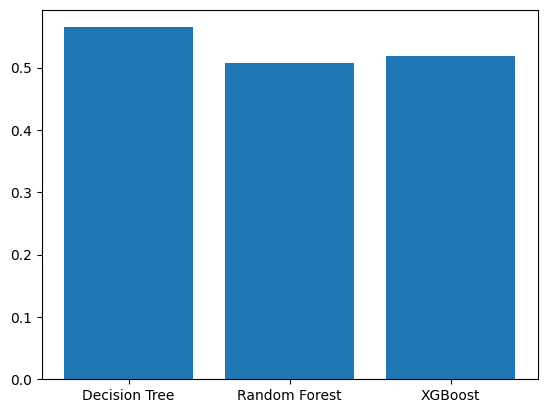

In [ ]:
plt.bar(model_names,model_scores)

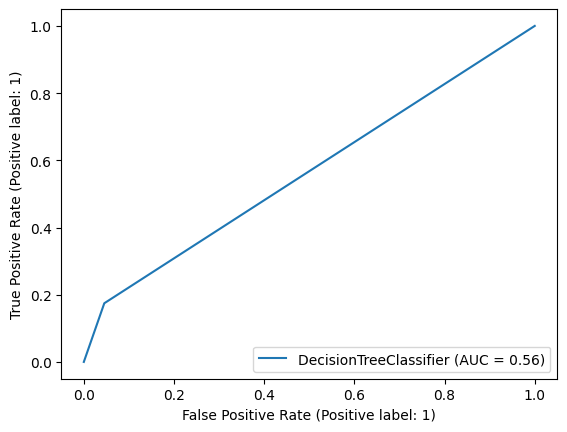

In [ ]:
fm = DecisionTreeClassifier(random_state=10)
fm.fit(X_train, Y_train)
Y_preds = fm.predict(X_test)
RocCurveDisplay.from_estimator(fm,X_test,Y_test);
